# ***Part I: Inventory & Capacity Planning (Overbooking level optimization)***
- Hyatt’s Problem 
- Dataset: none needed (building simulation)

## Objective: **Determine how many rooms (Y) should be overbooked (sold in excess of capacity) by Hyatt, based on the Y that maximizes expected profit**

Summarizing Details:
- Capacity: 100 rooms
- Room price: $150
- Demand forecast for no-shows: normal with mean 8, standard deviation 2

In [166]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Set input parameters

In [167]:
no_show_mean = 8
no_show_sd = 2
price = 150
voucher = 25
capacity = 100

## Simulate the number of no-shows as shown in the Excel spreadsheet example (use 5000 simulation runs)

In [168]:
simulation_run = 5000
np.random.seed(875)
df_no_show = pd.DataFrame({'no_show' : np.random.normal(no_show_mean,no_show_sd,simulation_run).round()})
df_no_show

,no_show
0,7.0
1,8.0
2,8.0
3,9.0
4,10.0
...,...
4995,6.0
4996,7.0
4997,6.0
4998,10.0


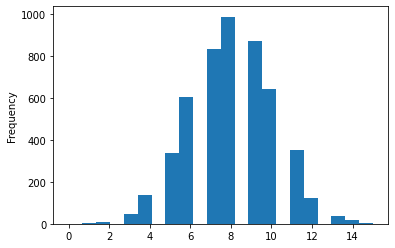

In [169]:
#np.random.normal(10,5,50).std()
df_no_show.no_show.plot.hist(bins=22)

## Develop an algorithm that tests different overbooking levels and computes the average expected profit


- Solely based on the average profit, I will recommend set the overbooking level at 10 rooms, **since the average profit at 10 is 14922.695** and the maximum among all overbooking levels.

- If consider both average profit and std profit, I will suggest that setting the overbooking level at **11 rooms** would result in **the second-highest average profit (14916.210)** but its **std profit is only 56** and ranked at **the 4th place**.



In [170]:
# as a rule of thumb, try overbook levels between
# mean - 3SD, mean + 3SD
df_optimize = pd.DataFrame({'overbook_level' : np.arange(2,15)})

In [171]:
for i in np.arange(0,df_optimize.shape[0]):
    df_no_show['over_book_level'] = df_optimize.overbook_level[i]
    df_no_show['net_room'] = (capacity + df_optimize.overbook_level[i] - df_no_show.no_show).clip(upper = capacity)
    df_no_show['room_rev'] = df_no_show['net_room'] * price
    df_no_show['denials'] = (df_optimize.overbook_level[i] - df_no_show.no_show).clip(lower = 0)
    df_no_show['denials_cost'] = df_no_show['denials'] * voucher
 
    df_no_show['empty_room'] = (df_no_show.no_show - df_optimize.overbook_level[i]).clip(lower = 0) 
    df_no_show['empty_room_opportunity_cost'] = df_no_show['empty_room'] * price
    df_no_show['profit'] = df_no_show['room_rev'] - df_no_show['denials_cost'] - df_no_show['empty_room_opportunity_cost']

    df_optimize.loc[i,'avg_profit'] = df_no_show.profit.mean()
    df_optimize.loc[i,'sd_profit'] = df_no_show.profit.std()

In [172]:
df_no_show

,no_show,over_book_level,net_room,room_rev,denials,denials_cost,empty_room,empty_room_opportunity_cost,profit
0,7.0,14,100.0,15000.0,7.0,175.0,0.0,0.0,14825.0
1,8.0,14,100.0,15000.0,6.0,150.0,0.0,0.0,14850.0
2,8.0,14,100.0,15000.0,6.0,150.0,0.0,0.0,14850.0
3,9.0,14,100.0,15000.0,5.0,125.0,0.0,0.0,14875.0
4,10.0,14,100.0,15000.0,4.0,100.0,0.0,0.0,14900.0
...,...,...,...,...,...,...,...,...,...
4995,6.0,14,100.0,15000.0,8.0,200.0,0.0,0.0,14800.0
4996,7.0,14,100.0,15000.0,7.0,175.0,0.0,0.0,14825.0
4997,6.0,14,100.0,15000.0,8.0,200.0,0.0,0.0,14800.0
4998,10.0,14,100.0,15000.0,4.0,100.0,0.0,0.0,14900.0


In [173]:
df_optimize

,overbook_level,avg_profit,sd_profit
0,2,13196.020,606.048157
1,3,13495.240,603.941671
2,4,13791.275,595.092914
3,5,14078.275,571.847490
4,6,14343.240,522.946218
5,7,14569.010,444.096346
6,8,14740.570,343.660728
7,9,14848.040,237.664060
8,10,14899.025,148.761892
9,11,14908.410,91.066901


In [174]:
# sort the avg_profit in the descending order
df_optimize.sort_values(['avg_profit'], ascending = False)

,overbook_level,avg_profit,sd_profit
9,11,14908.410,91.066901
8,10,14899.025,148.761892
10,12,14895.045,62.686593
11,13,14873.750,52.330538
12,14,14850.050,50.512452
7,9,14848.040,237.664060
6,8,14740.570,343.660728
5,7,14569.010,444.096346
4,6,14343.240,522.946218
3,5,14078.275,571.847490


In [175]:
# sort the sd_profit in the ascending order
df_optimize.sort_values(['sd_profit'], ascending = True)

,overbook_level,avg_profit,sd_profit
12,14,14850.050,50.512452
11,13,14873.750,52.330538
10,12,14895.045,62.686593
9,11,14908.410,91.066901
8,10,14899.025,148.761892
7,9,14848.040,237.664060
6,8,14740.570,343.660728
5,7,14569.010,444.096346
4,6,14343.240,522.946218
3,5,14078.275,571.847490


## Plot the relationship between avg profit vs. overbooking level and sd of profit vs.overbooking level

<Figure size 576x432 with 0 Axes>

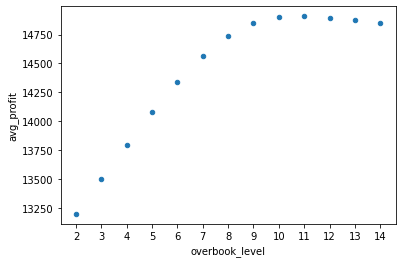

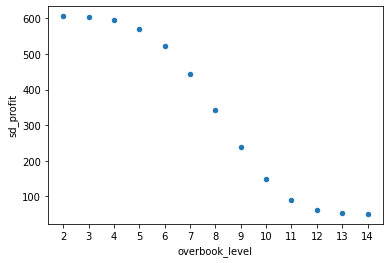

In [176]:
plt.figure(figsize=(8, 6))
df_optimize.plot.scatter(x='overbook_level',y='avg_profit',xticks=range(2,15))
df_optimize.plot.scatter(x='overbook_level',y='sd_profit',xticks=range(2,15));

## Plot the profit risk in terms of the efficiency frontier (avg profit vs. sd profit)

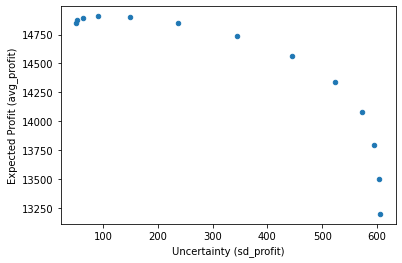

In [177]:
df_optimize.plot.scatter(y='avg_profit',x='sd_profit').set(ylabel="Expected Profit (avg_profit)", xlabel="Uncertainty (sd_profit)");

## Summary

- Solely based on the average profit, I will recommend set the overbooking level at 10 rooms, **since the average profit at 10 is 14922.695** and the maximum among all overbooking levels.

- If consider both average profit and std profit, I will suggest that setting the overbooking level at **11 rooms** would result in **the second-highest average profit (14916.210)** but its **std profit is only 56** and ranked at **the 4th place**.

# ***Part II: Inventory & Capacity Planning (Inventory level optimization)***
- The Parka Problem 
- Dataset: none needed (building simulation)


## **Your main objective is as follows: Determine how many parkas (Q) should L.L. Bean purchase from its supplier, based on the Q that maximizes expected profit**

Summarizing Details:

- Procurement cost = $70

- New item price = $140

- Markdown price = $40

- Demand forecast for parkas: normal with mean 26, standard deviation 3

## Set input parameters

In [178]:
cost = 70
orginal_price = 140
markdown_price = 40
demand_mean = 26
demand_std = 3

## Simulate the order demand (use 5000 simulation runs)

In [179]:
simulation_run = 5000
np.random.seed(875)
df_demand = pd.DataFrame({'demand' : np.random.normal(demand_mean,demand_std,simulation_run).round()})
df_demand

,demand
0,25.0
1,26.0
2,25.0
3,27.0
4,30.0
...,...
4995,23.0
4996,24.0
4997,24.0
4998,28.0


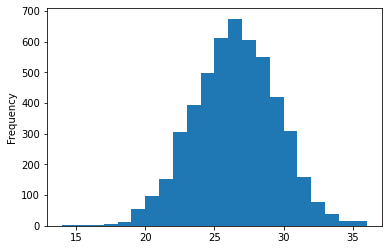

In [180]:
df_demand.demand.plot.hist(bins=22)

## Develop an algorithm that tests different order size levels and computes the average expected profit

In [181]:
# As a rule of thumb, try order size levels between (mean - 3SD), (mean + 3SD)
df_optimize = pd.DataFrame({'order_size' : np.arange(demand_mean - 3 * demand_std,demand_mean + 3 * demand_std + 1)})
df_optimize

,order_size
0,17
1,18
2,19
3,20
4,21
5,22
6,23
7,24
8,25
9,26


- old algorithm

In [182]:
# demand_dict= {}
# for i in np.arange(0, df_optimize.shape[0]):

#   df_demand['order_size'] = df_optimize['order_size'][i]
  
#   df_demand.loc[df_demand['demand'] >= df_optimize['order_size'][i], 'T/F'] = 1
#   df_demand.loc[df_demand['demand'] < df_optimize['order_size'][i], 'T/F'] = 0

 
#   df_demand.loc[df_demand['T/F'] == 1,'procurement_cost'] = df_demand['order_size'] * cost  
#   df_demand.loc[df_demand['T/F'] == 1, 'rev_original'] = df_demand['order_size'] * orginal_price
#   df_demand.loc[df_demand['T/F'] == 1, 'rev_markdown'] = 0
#   df_demand.loc[df_demand['T/F'] == 1, 'total_profit'] = df_demand['rev_original'] + df_demand['rev_markdown'] - df_demand['procurement_cost']

#   df_demand.loc[df_demand['T/F'] == 0,'procurement_cost'] =  df_demand['order_size'] * cost  
#   df_demand.loc[df_demand['T/F'] == 0, 'rev_original'] = df_demand['demand'] * orginal_price
#   df_demand.loc[df_demand['T/F'] == 0, 'rev_markdown'] = (df_demand['order_size'] - df_demand.demand ) * markdown_price 
#   df_demand.loc[df_demand['T/F'] == 0, 'total_profit'] = df_demand['rev_original'] + df_demand['rev_markdown'] - df_demand['procurement_cost']

#   df_demand_dict = df_demand.copy()
#   demand_dict[i] = df_demand_dict

#   df_optimize.loc[i, 'avg_profit'] = df_demand['total_profit'].mean()
#   df_optimize.loc[i, 'std_profit'] = df_demand['total_profit'].std()

- new loop using df.clip()

In [183]:
demand_dict= {}
for i in np.arange(0, df_optimize.shape[0]):

  df_demand['order_size'] = df_optimize['order_size'][i]
  # 'actual sales' should be always less than 'order_size'
  # 'actual sales' are calculated using 'original_price'
  df_demand.loc[:,'rev_original'] = df_demand['demand'].clip(upper = df_demand.order_size) * orginal_price
  # Markdown revenue happenes only when the diff b/w 'order_size' and 'demand' is more than 0
  df_demand.loc[:,'rev_markdown'] = (df_demand['order_size'] - df_demand.demand).clip(lower = 0) * markdown_price
  # The cost should always be the order_size * cost
  df_demand.loc[:,'procurement_cost'] =  df_demand['order_size'] * cost  
  df_demand.loc[:,'total_profit'] = df_demand['rev_original'] + df_demand['rev_markdown'] - df_demand['procurement_cost']

  df_demand_dict = df_demand.copy()
  demand_dict[i] = df_demand_dict

  df_optimize.loc[i, 'avg_profit'] = df_demand['total_profit'].mean()
  df_optimize.loc[i, 'std_profit'] = df_demand['total_profit'].std()

In [184]:
demand_dict[18]

,demand,order_size,rev_original,rev_markdown,procurement_cost,total_profit
0,25.0,35,3500.0,400.0,2450,1450.0
1,26.0,35,3640.0,360.0,2450,1550.0
2,25.0,35,3500.0,400.0,2450,1450.0
3,27.0,35,3780.0,320.0,2450,1650.0
4,30.0,35,4200.0,200.0,2450,1950.0
...,...,...,...,...,...,...
4995,23.0,35,3220.0,480.0,2450,1250.0
4996,24.0,35,3360.0,440.0,2450,1350.0
4997,24.0,35,3360.0,440.0,2450,1350.0
4998,28.0,35,3920.0,280.0,2450,1750.0


In [185]:
# sort the avg_profit in the descending order
df_optimize.sort_values(['avg_profit'], ascending = False)

,order_size,avg_profit,std_profit
11,28,1716.60,240.299789
10,27,1714.90,210.890694
12,29,1707.32,263.582080
9,26,1701.12,177.769137
13,30,1689.66,280.219180
8,25,1673.84,142.925645
14,31,1665.80,290.067557
15,32,1638.76,295.655111
7,24,1634.32,109.342255
16,33,1610.16,298.720306


In [186]:
# sort the std_profit in the ascending order
df_optimize.sort_values(['std_profit'], ascending = True)

,order_size,avg_profit,std_profit
0,17,1189.82,6.162402
1,18,1259.62,9.688879
2,19,1329.16,14.674381
3,20,1397.62,23.074707
4,21,1464.12,36.464936
5,22,1527.54,55.166630
6,23,1584.86,79.543987
7,24,1634.32,109.342255
8,25,1673.84,142.925645
9,26,1701.12,177.769137


## Plot the relationship between avg profit vs. order level and sd of profit vs. order level

<Figure size 720x360 with 0 Axes>

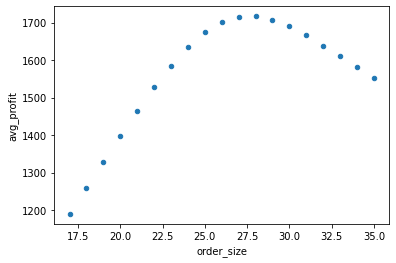

In [187]:
plt.figure(figsize=(10, 5))
df_optimize.plot(y = 'avg_profit', x = 'order_size', kind = 'scatter')

<Figure size 720x360 with 0 Axes>

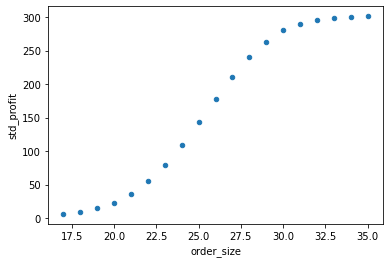

In [188]:
plt.figure(figsize=(10, 5))
df_optimize.plot(y = 'std_profit', x = 'order_size', kind = 'scatter')

## Plot the profit risk in terms of the efficiency frontier (avg profit vs. sd profit)

<Figure size 720x360 with 0 Axes>

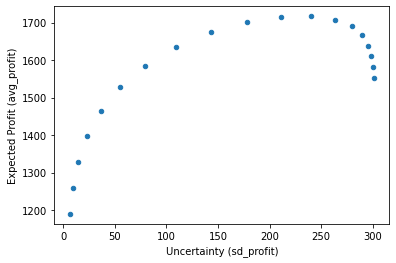

In [189]:
plt.figure(figsize=(10, 5))
df_optimize.plot(x = 'std_profit', y = 'avg_profit', kind = 'scatter').set(ylabel="Expected Profit (avg_profit)", xlabel="Uncertainty (sd_profit)");

## Summary

- Solely based on the average profit, I will recommend set the order level at 28 units, since **the average profit at 28 is 1716.60** and the maximum among all order levels.


- If consider both average profit and std profit, I will suggest that setting the overbooking level at **26 units** would result in **the fourth-highest average (1701.12) profit** but its **std profit is only 177.769137 and ranked at the middle**.


